# Introduction
    Feature selection
    Linear regression 
    baseline DecisionTree, MLP, Ensemble 

## 1) Feature selection
    

###### - Pandas로 training dataset, test dataset 불러오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import numpy as np

import re
import sklearn

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

df_train = pd.read_csv('../input/Train_data.csv')
df_test = pd.read_csv('../input/test_data.csv')
df_test = df_test.drop('Unnamed: 0', axis=1)

In [2]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,25,4,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,0,icmp,25,2,312,1856,0,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,0,icmp,25,2,245,2058,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,0,icmp,25,2,298,1267,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,icmp,20,2,740,0,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal


###### - training dataset

In [4]:
X_train = df_train.drop('xAttack', axis=1)
Y_train = df_train.loc[:,['xAttack']]
X_test = df_test.drop('xAttack', axis=1)
Y_test = df_test.loc[:,['xAttack']]

###### - preprocessing one hot encoding  onehotencoder,  LabelBinarizer

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [6]:
le = preprocessing.LabelEncoder()
enc = OneHotEncoder()
lb = preprocessing.LabelBinarizer()

- X OneHotEncoding

In [7]:
X_train['protocol_type'] = le.fit_transform(X_train['protocol_type'])
# enc.fit_transform(X_train['protocol_type'])

X_test['protocol_type'] = le.fit_transform(X_test['protocol_type'])
# enc.fit_transform(X_test['protocol_type'])

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


- Y LabelBinarizer

In [8]:
Y_train['xAttack'] = le.fit_transform(Y_train['xAttack'])
lb.fit_transform(Y_train['xAttack'])

Y_test['xAttack'] = le.fit_transform(Y_test['xAttack'])
lb.fit_transform(Y_test['xAttack'])

Y_train.describe()

,xAttack
count,125973.000000
mean,0.744985
std,0.653748
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,4.000000


### 1. Standard deviation
    standard deviation continuous discrete

In [9]:
#except continuous feature
con_list = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'su_attempted', 'is_host_login', 'is_guest_login']
con_train = X_train.drop(con_list, axis=1)

#drop n smallest std features
stdtrain = con_train.std(axis=0)
std_X_train = stdtrain.to_frame()
std_X_train.nsmallest(10, columns=0).head(10)

,0
num_outbound_cmds,0.000000
urgent,0.014366
num_shells,0.022181
root_shell,0.036603
num_failed_logins,0.045239
num_access_files,0.099370
dst_host_srv_diff_host_rate,0.112564
diff_srv_rate,0.180314
dst_host_diff_srv_rate,0.188922
wrong_fragment,0.253530


#### num_outbound_cmds  standard deviation

In [10]:
X_train = X_train.drop(['num_outbound_cmds'], axis=1)
X_test = X_test.drop(['num_outbound_cmds'], axis=1)

df_train = pd.concat([X_train, Y_train], axis=1)
df_train.head()

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### std  feature  drop -> X_train_stdrop . (Ensemble feature selection )

In [11]:
stdrop_list = ['urgent', 'num_shells', 'root_shell',
        'num_failed_logins', 'num_access_files', 'dst_host_srv_diff_host_rate',
        'diff_srv_rate', 'dst_host_diff_srv_rate', 'wrong_fragment']

X_test_stdrop = X_test.drop(stdrop_list, axis=1)

X_train_stdrop = X_train.drop(stdrop_list, axis=1)

df_train_stdrop = pd.concat([X_train_stdrop, Y_train], axis=1)

df_train_stdrop.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,20,2,491,0,0,0,0,0,...,0.00,150,25,0.17,0.17,0.00,0.00,0.05,0.00,1
1,0,2,45,2,146,0,0,0,0,0,...,0.00,255,1,0.00,0.88,0.00,0.00,0.00,0.00,1
2,0,0,50,4,0,0,0,0,0,0,...,0.00,255,26,0.10,0.00,1.00,1.00,0.00,0.00,0
3,0,0,25,2,232,8153,0,0,1,0,...,0.00,30,255,1.00,0.03,0.03,0.01,0.00,0.01,1
4,0,0,25,2,199,420,0,0,1,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,1


### Baseline - Linear regression

- Linear regression

In [12]:
from sklearn import linear_model

In [13]:
LR = linear_model.LinearRegression()

In [14]:
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
lr_score = LR.score(X_test, Y_test)
print('Linear regression processing ,,,')
print('Linear regression Score: %.2f %%' % lr_score)

Linear regression processing ,,,
Linear regression Score: 0.33 %


##### linear regression 33%

### 2. Ensemble feature selection
    Ensemble Modeling feature selection(Irrelevant 한 feature).

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

In [17]:
AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=1.0)
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='auto', bootstrap=True)
ET = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='auto', bootstrap=False)
GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, max_features='auto')

In [18]:
y_train = Y_train['xAttack'].ravel()
x_train = X_train.values
x_test = X_test.values

### feature importances

In [19]:
AB.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [20]:
AB_feature = AB.feature_importances_
AB_feature

ab_score = AB.score(X_test, Y_test)

print('AdaBoostClassifier processing ,,,')
print('AdaBoostClassifier Score: %.3f %%' % ab_score)

AdaBoostClassifier processing ,,,
AdaBoostClassifier Score: 0.761 %


In [21]:
RF.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
RF_feature = RF.feature_importances_
RF_feature

rf_score = RF.score(X_test, Y_test)

print('RandomForestClassifier processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf_score)

RandomForestClassifier processing ,,,
RandomForestClassifier Score: 0.755 %


In [23]:
ET.fit(X_train, Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
ET_feature = ET.feature_importances_
ET_feature

et_score = ET.score(X_test, Y_test)

print('ExtraTreesClassifier processing ,,,')
print('ExtraTreeClassifier: %.3f %%' % et_score)

ExtraTreesClassifier processing ,,,
ExtraTreeClassifier: 0.752 %


In [25]:
GB.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [26]:
GB_feature = GB.feature_importances_
GB_feature

gb_score = GB.score(X_test, Y_test)

print('GradientBoostingClassifier processing ,,,')
print('GradientBoostingClassifier Score: %.3f %%' % gb_score)

GradientBoostingClassifier processing ,,,
GradientBoostingClassifier Score: 0.763 %


###Ensemble feature

In [27]:
cols = X_train.columns.values

feature_df = pd.DataFrame({'features': cols,
                           'AdaBoost' : AB_feature,
                           'RandomForest' : RF_feature,
                           'ExtraTree' : ET_feature,
                           'GradientBoost' : GB_feature
                          })
feature_df.head(8)

,AdaBoost,ExtraTree,GradientBoost,RandomForest,features
0,0.002322,0.003797,0.054953,0.003241,duration
1,NaN,0.045392,0.038749,0.019766,protocol_type
2,NaN,0.024527,0.050721,0.034977,service
3,0.000490,0.049257,0.017423,0.010574,flag
4,NaN,0.027261,0.215598,0.085649,src_bytes
5,0.005035,0.005703,0.066595,0.061388,dst_bytes
6,0.000021,0.000049,0.012490,0.000030,land
7,0.000231,0.012109,0.013929,0.007835,wrong_fragment


- Feature Engineering

[Text(0,0,'duration'),
 Text(0,0,'protocol_type'),
 Text(0,0,'service'),
 Text(0,0,'flag'),
 Text(0,0,'src_bytes'),
 Text(0,0,'dst_bytes'),
 Text(0,0,'land'),
 Text(0,0,'wrong_fragment'),
 Text(0,0,'urgent'),
 Text(0,0,'hot'),
 Text(0,0,'num_failed_logins'),
 Text(0,0,'logged_in'),
 Text(0,0,'num_compromised'),
 Text(0,0,'root_shell'),
 Text(0,0,'su_attempted'),
 Text(0,0,'num_root'),
 Text(0,0,'num_file_creations'),
 Text(0,0,'num_shells'),
 Text(0,0,'num_access_files'),
 Text(0,0,'is_host_login'),
 Text(0,0,'is_guest_login'),
 Text(0,0,'count'),
 Text(0,0,'srv_count'),
 Text(0,0,'serror_rate'),
 Text(0,0,'srv_serror_rate'),
 Text(0,0,'rerror_rate'),
 Text(0,0,'srv_rerror_rate'),
 Text(0,0,'same_srv_rate'),
 Text(0,0,'diff_srv_rate'),
 Text(0,0,'srv_diff_host_rate'),
 Text(0,0,'dst_host_count'),
 Text(0,0,'dst_host_srv_count'),
 Text(0,0,'dst_host_same_srv_rate'),
 Text(0,0,'dst_host_diff_srv_rate'),
 Text(0,0,'dst_host_same_src_port_rate'),
 Text(0,0,'dst_host_srv_diff_host_rate'),
 

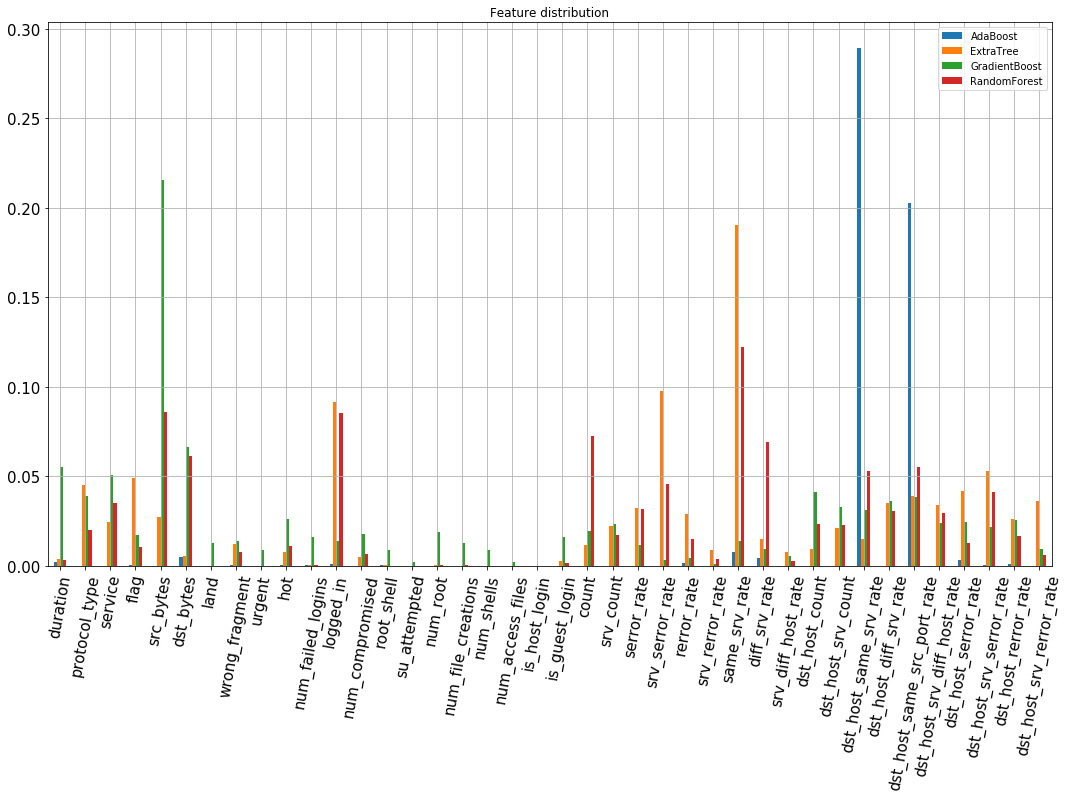

In [28]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

graph = feature_df.plot.bar(figsize = (18, 10), title = 'Feature distribution', grid=True, legend=True, fontsize = 15, 
                            xticks=feature_df.index)
graph.set_xticklabels(feature_df.features, rotation = 80)

#### Ensemble model feature

In [29]:
a_f = feature_df.nlargest(12, 'AdaBoost')
e_f = feature_df.nlargest(12, 'ExtraTree')
g_f = feature_df.nlargest(12, 'GradientBoost')
r_f = feature_df.nlargest(12, 'RandomForest')

duplicate

In [30]:
result = pd.concat([a_f, e_f, g_f, r_f])
result = result.drop_duplicates() # duplicate feature삭제
result

,AdaBoost,ExtraTree,GradientBoost,RandomForest,features
32,0.289132,0.015210,0.030964,0.052747,dst_host_same_srv_rate
34,0.202874,0.038725,0.038379,0.054923,dst_host_same_src_port_rate
27,0.007645,0.190512,0.014083,0.122075,same_srv_rate
5,0.005035,0.005703,0.066595,0.061388,dst_bytes
28,0.004399,0.014711,0.009482,0.069354,diff_srv_rate
36,0.003473,0.041654,0.024251,0.012781,dst_host_serror_rate
0,0.002322,0.003797,0.054953,0.003241,duration
25,0.001336,0.029120,0.004395,0.014879,rerror_rate
11,0.001223,0.091332,0.013688,0.085204,logged_in
38,0.000763,0.026282,0.025715,0.016794,dst_host_rerror_rate


In [31]:
selected_features = result['features'].values.tolist()
selected_features

['dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'same_srv_rate',
 'dst_bytes',
 'diff_srv_rate',
 'dst_host_serror_rate',
 'duration',
 'rerror_rate',
 'logged_in',
 'dst_host_rerror_rate',
 'hot',
 'num_failed_logins',
 'srv_serror_rate',
 'dst_host_srv_serror_rate',
 'flag',
 'protocol_type',
 'dst_host_srv_rerror_rate',
 'dst_host_diff_srv_rate',
 'dst_host_srv_diff_host_rate',
 'serror_rate',
 'src_bytes',
 'service',
 'dst_host_count',
 'dst_host_srv_count',
 'count']

###  standard deviation feature training

In [32]:
AB.fit(X_train_stdrop, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [33]:
ab2_score = AB.score(X_test_stdrop, Y_test)

print('AdaBoostClassifier_stdrop processing ,,,')
print('AdaBoostClasifier Score: %.3f %%' % ab2_score)

AdaBoostClassifier_stdrop processing ,,,
AdaBoostClasifier Score: 0.761 %


In [34]:
RF.fit(X_train_stdrop, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
rf2_score = RF.score(X_test_stdrop, Y_test)

print('RandomForestClassifier_stdrop processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf2_score)

RandomForestClassifier_stdrop processing ,,,
RandomForestClassifier Score: 0.754 %


In [36]:
ET.fit(X_train_stdrop, Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [37]:
et2_score = ET.score(X_test_stdrop, Y_test)

print('ExtraTreesClassifier_stdrop processing ,,,')
print('ExtraTreesClassifier Score: %.3f %%' % et2_score)

ExtraTreesClassifier_stdrop processing ,,,
ExtraTreesClassifier Score: 0.753 %


In [38]:
GB.fit(X_train_stdrop, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [39]:
gb2_score = GB.score(X_test_stdrop, Y_test)

print('GradientBoostingClassifier_stdrop processing ,,,')
print('GradientBoostingClassifier Score: %.2f %%' % gb2_score)

GradientBoostingClassifier_stdrop processing ,,,
GradientBoostingClassifier Score: 0.76 %


- ensemble

In [40]:
X_train_ens = X_train[selected_features]
X_train_ens.head()

X_test_ens = X_test[selected_features]
X_test_ens.head()

,dst_host_same_srv_rate,dst_host_same_src_port_rate,same_srv_rate,dst_bytes,diff_srv_rate,dst_host_serror_rate,duration,rerror_rate,logged_in,dst_host_rerror_rate,...,protocol_type,dst_host_srv_rerror_rate,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,serror_rate,src_bytes,service,dst_host_count,dst_host_srv_count,count
0,1.00,0.00,1.0,0,0.0,0.65,0,0.0,0,0.32,...,0,0.32,0.00,0.00,1.0,0,25,255,255,110
1,1.00,1.00,1.0,1856,0.0,0.00,0,0.0,1,0.00,...,0,0.00,0.00,0.06,0.0,312,25,1,254,1
2,1.00,0.01,1.0,2058,0.0,0.01,0,0.0,1,0.00,...,0,0.00,0.00,0.05,0.0,245,25,114,255,5
3,1.00,0.00,1.0,1267,0.0,0.00,0,0.0,1,0.00,...,0,0.00,0.00,0.00,0.0,298,25,255,255,4
4,0.18,0.18,1.0,0,0.0,0.00,0,0.0,0,0.00,...,0,0.00,0.03,0.00,0.0,740,20,104,19,1


### 3. Correlation
 correlation

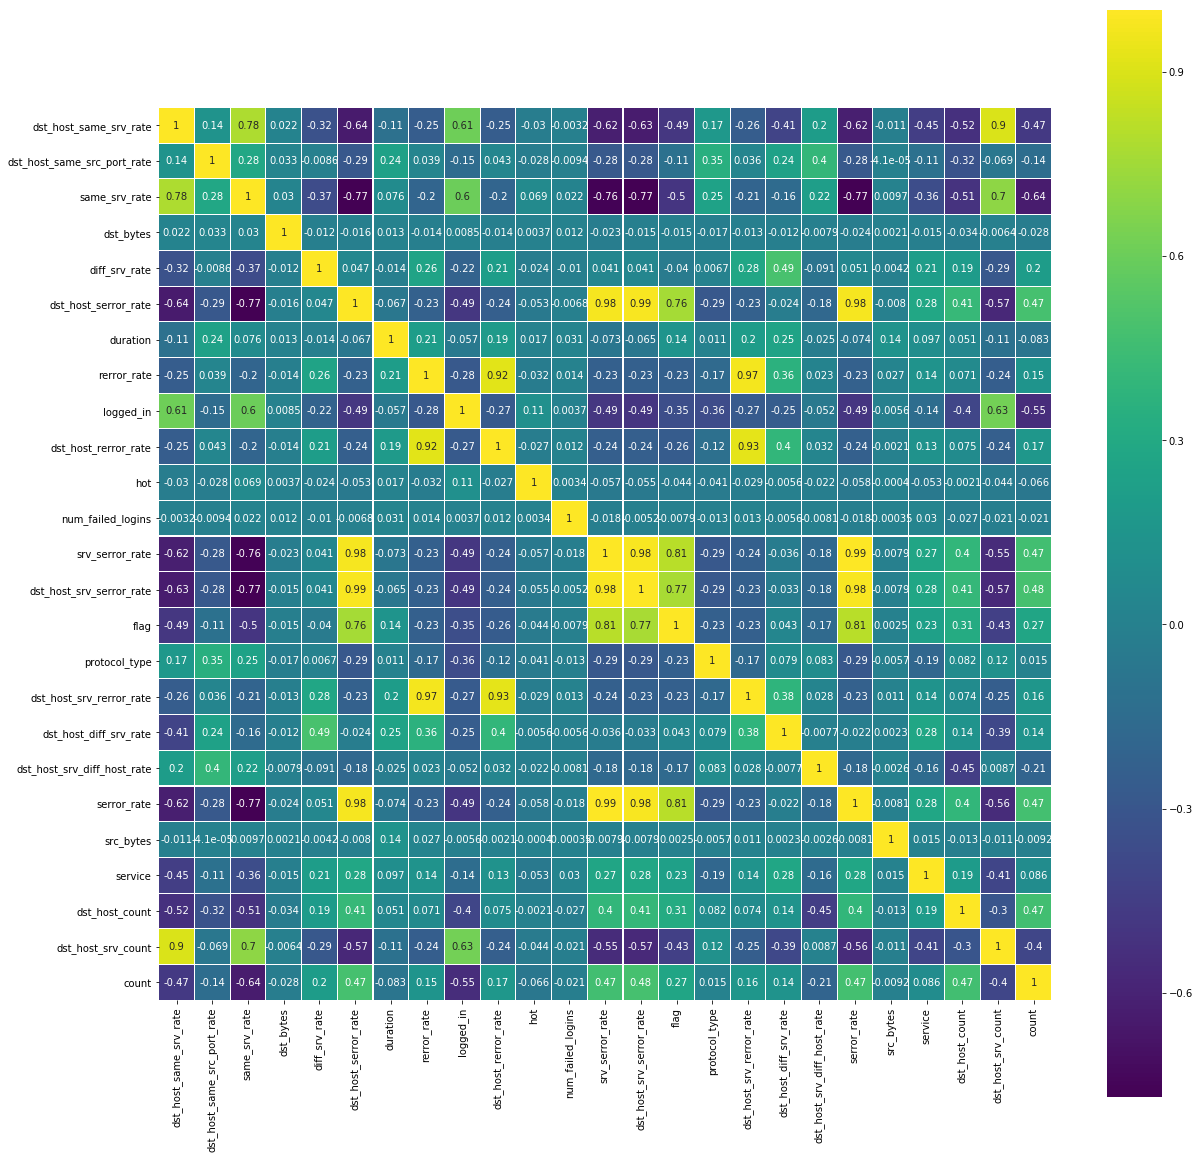

In [41]:
sample = X_train_ens[:10000]

colormap = plt.cm.viridis
plt.figure(figsize=(20, 20))
sns.heatmap(sample.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

 feature dependency

In [42]:
selected2 = ['flag', 'dst_host_serror_rate', 'serror_rate']
X_train_cordrop = X_train_ens.drop(selected2, axis=1)
X_train_cordrop.describe()

X_test_cordrop = X_test_ens.drop(selected2, axis=1)
X_test_cordrop.describe()

,dst_host_same_srv_rate,dst_host_same_src_port_rate,same_srv_rate,dst_bytes,diff_srv_rate,duration,rerror_rate,logged_in,dst_host_rerror_rate,hot,...,dst_host_srv_serror_rate,protocol_type,dst_host_srv_rerror_rate,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,src_bytes,service,dst_host_count,dst_host_srv_count,count
count,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.605769,0.133167,0.739925,1.996999e+03,0.089752,229.263000,0.241316,0.436600,0.236296,0.093200,...,0.097781,0.278600,0.230181,0.089412,0.020102,6.845032e+03,35.451700,194.522200,139.645700,80.152400
std,0.436278,0.307154,0.413711,2.006975e+04,0.252240,1461.180594,0.418059,0.495989,0.389137,0.647731,...,0.279651,0.657134,0.403294,0.218190,0.089353,8.675409e+04,15.824769,93.746065,111.548555,129.028094
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,1.000000
25%,0.070000,0.000000,0.200000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,125.000000,15.000000,1.000000
50%,0.910000,0.000000,1.000000,4.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020000,0.000000,5.400000e+01,25.000000,255.000000,159.500000,8.000000
75%,1.000000,0.030000,1.000000,5.990000e+02,0.060000,0.000000,0.330000,1.000000,0.390000,0.000000,...,0.000000,0.000000,0.220000,0.060000,0.010000,2.850000e+02,50.000000,255.000000,255.000000,126.000000
max,1.000000,1.000000,1.000000,1.285078e+06,1.000000,57715.000000,1.000000,1.000000,1.000000,30.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,6.291668e+06,70.000000,255.000000,255.000000,511.000000


## 2) Modeling

### Feature selection- modeling (low deviation, high correlation 

### Ensemble modeling- feature- modeling 

In [43]:
AB.fit(X_train_cordrop, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [44]:
ab_finalscore = AB.score(X_test_cordrop, Y_test)

print('AdaBoostClassifier_final processing ,,,')
print('AdaBoostClassifier_final Score: %.3f %%' % ab_finalscore)

AdaBoostClassifier_final processing ,,,
AdaBoostClassifier_final Score: 0.761 %


In [45]:
RF.fit(X_train_cordrop, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
rf_finalscore = RF.score(X_test_cordrop, Y_test)

print('RandomForestClassifier_final processing ,,,')
print('RandomForestClassifier_final Score: %.3f %%' % rf_finalscore)

RandomForestClassifier_final processing ,,,
RandomForestClassifier_final Score: 0.749 %


In [47]:
ET.fit(X_train_cordrop, Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
et_finalscore = ET.score(X_test_cordrop, Y_test)

print('ExtraTreesClassifier_final processing ,,,')
print('ExtraTreesClassifier_final Score: %.3f %%' % et_finalscore)

ExtraTreesClassifier_final processing ,,,
ExtraTreesClassifier_final Score: 0.750 %


In [49]:
GB.fit(X_train_cordrop, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [50]:
gb_finalscore = GB.score(X_test_cordrop, Y_test)

print('GradientBoostClassifier_final processing ,,,')
print('GradientBoostClassifier_final Score: %.3f %%' % gb_finalscore)

GradientBoostClassifier_final processing ,,,
GradientBoostClassifier_final Score: 0.768 %


In [51]:
LR.fit(X_train_cordrop, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
lr_finalscore = LR.score(X_test_cordrop, Y_test)

print('LinearRegression_final processing ,,,')
print('LinearRegression_final Score: %.3f %%' % lr_finalscore)

LinearRegression_final processing ,,,
LinearRegression_final Score: 0.284 %


In [53]:
from sklearn.neural_network import MLPClassifier

In [54]:
MLP = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)

In [55]:
MLP.fit(X_train_cordrop, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 300, 300), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=False, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [56]:
mlp_finalscore = MLP.score(X_test_cordrop, Y_test)

print('MLP_final processing ,,,')
print('MLP_final Score: %.3f %%' % mlp_finalscore)

MLP_final processing ,,,
MLP_final Score: 0.688 %


## 3) Result

feature selection, extraction overfitting

###  score

- first models

In [57]:
first_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [lr_score, ab_score, rf_score, et_score, gb_score]}

result_df = pd.DataFrame(data = first_model)
result_df

,Model,accuracy
0,Linear Regression,0.334265
1,Adaboost,0.760700
2,RandomForest,0.755400
3,ExtraTrees,0.752300
4,GradientBoost,0.763400


[Text(0,0,'Linear Regression'),
 Text(0,0,'Adaboost'),
 Text(0,0,'RandomForest'),
 Text(0,0,'ExtraTrees'),
 Text(0,0,'GradientBoost')]

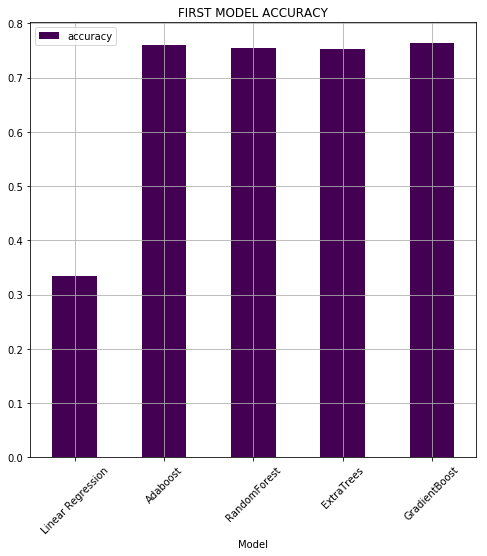

In [58]:
r1 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FIRST MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r1.set_xticklabels(result_df.Model, rotation = 45)

- second models

In [59]:
second_model = {'Model': ['Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [ab2_score, rf2_score, et2_score, gb2_score]}

result_df = pd.DataFrame(data = second_model)
result_df

,Model,accuracy
0,Adaboost,0.7609
1,RandomForest,0.7536
2,ExtraTrees,0.7527
3,GradientBoost,0.7612


[Text(0,0,'Adaboost'),
 Text(0,0,'RandomForest'),
 Text(0,0,'ExtraTrees'),
 Text(0,0,'GradientBoost')]

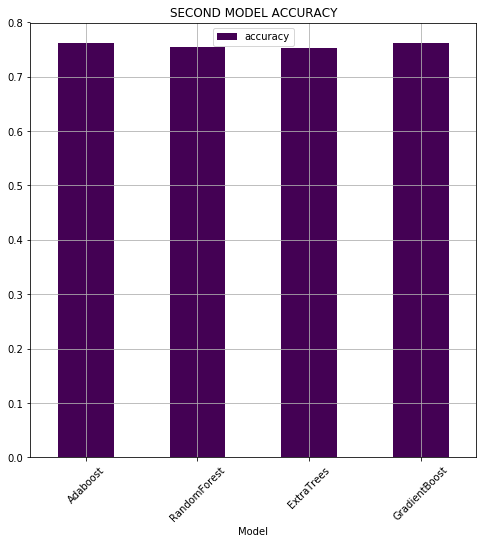

In [60]:
r2 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='SECOND MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r2.set_xticklabels(result_df.Model, rotation = 45)

- final models

In [61]:
final_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost', 'MLP'],
               'accuracy' : [lr_finalscore, ab_finalscore, rf_finalscore, et_finalscore, gb_finalscore, mlp_finalscore]}

result_df = pd.DataFrame(data = final_model)
result_df

,Model,accuracy
0,Linear Regression,0.284209
1,Adaboost,0.760800
2,RandomForest,0.749100
3,ExtraTrees,0.750400
4,GradientBoost,0.767800
5,MLP,0.687700


[Text(0,0,'Linear Regression'),
 Text(0,0,'Adaboost'),
 Text(0,0,'RandomForest'),
 Text(0,0,'ExtraTrees'),
 Text(0,0,'GradientBoost'),
 Text(0,0,'MLP')]

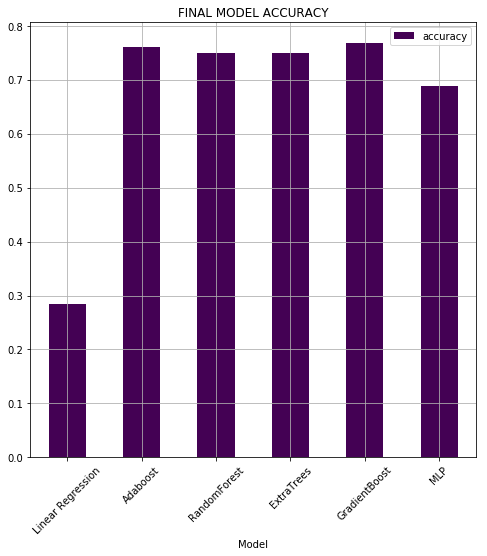

In [62]:
r3 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FINAL MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r3.set_xticklabels(result_df.Model, rotation = 45)

## FASTEST AND ACCURATE MODEL - final model ExtraTrees(76.4%)
## STRONGEST AND THE MOST ACCURATE MODEL - final mode GradientBoost(77.1%)

Gradient boost ExtraTress